In [ ]:
# I have no idea if this is done right the other one looks different but better

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [14]:
ESI = pd.read_csv('~renoodle/Downloads/Employee Satisfaction Index.csv')

In [15]:
#Recode Activity into a New Variable

In [16]:
ESI.head()

Unnamed: 0    emp_id  age        Dept location education  \
0           0    HR8270   28          HR   Suburb        PG   
1           1  TECH1860   50  Technology   Suburb        PG   
2           2  TECH6390   43  Technology   Suburb        UG   
3           3   SAL6191   44       Sales     City        PG   
4           4    HR6734   33          HR     City        UG   

     recruitment_type  job_level  rating  onsite  awards  certifications  \
0            Referral          5       2       0       1               0   
1             Walk-in          3       5       1       2               1   
2            Referral          4       1       0       2               0   
3           On-Campus          2       3       1       0               0   
4  Recruitment Agency          2       1       0       5               0   

   salary  satisfied  
0   86750          1  
1   42419          0  
2   65715          0  
3   29805          1  
4   29805          1

In [17]:
# Testing for Linearity and Normality

In [28]:
emsain = ESI[['Dept', 'job_level', 'recruitment_type', 'rating', 'satisfied']]

In [29]:
emsain.head()

Dept  job_level    recruitment_type  rating  satisfied
0          HR          5            Referral       2          1
1  Technology          3             Walk-in       5          0
2  Technology          4            Referral       1          0
3       Sales          2           On-Campus       3          1
4          HR          2  Recruitment Agency       1          1

<AxesSubplot:xlabel='job_level', ylabel='Density'>

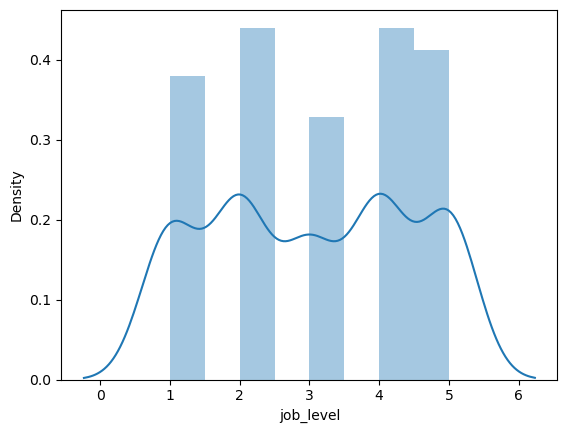

In [35]:
sns.distplot(ESI['job_level'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

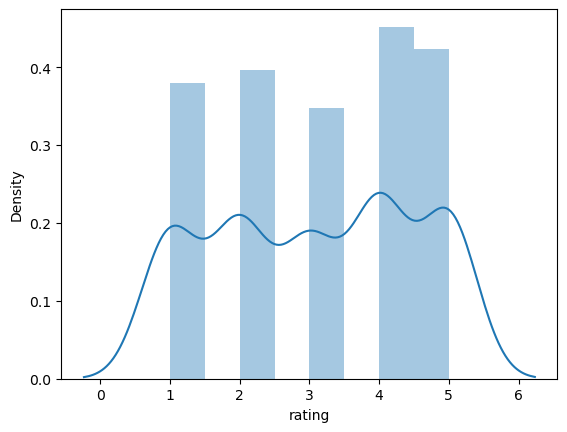

In [36]:
sns.distplot(ESI['rating'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfied', ylabel='Density'>

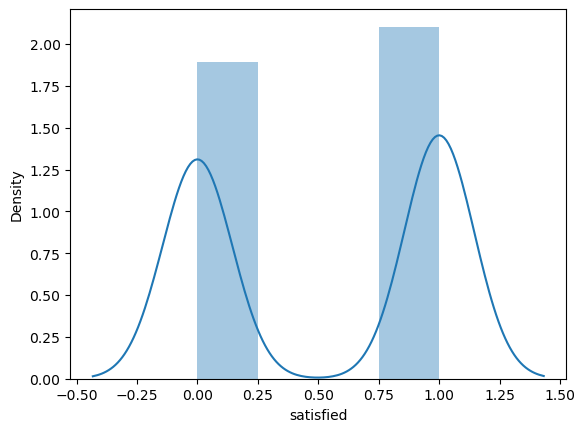

In [37]:
sns.distplot(ESI['satisfied'])

In [38]:
# Testing for Homoscedasticity

In [39]:
x = ESI['satisfied']
y = ESI['rating']

In [40]:
model = sm.OLS(y,x).fit()

In [42]:
print(model)

In [41]:
# Test for Homoscedasticity

In [46]:
pred_val = model.fittedvalues.copy()
true_val = ESI['satisfied'].values.copy()
residual = true_val - pred_val

In [47]:
pred_val = model.fittedvalues.copy()
true_val = ESI['rating'].values.copy()
residual = true_val - pred_val

In [ ]:
## This doesn't look right to me

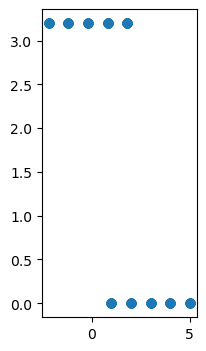

In [50]:
fig, ax = plt.subplots(figsize=(2, 4))
_ = ax.scatter(residual, pred_val)

In [52]:
sms.diagnostic.het_breuschpagan(residual, ESI[['satisfied']])

(12.010628997840833, nan, 12.281627892046954, 0.0004986262045604675)

In [53]:
sms.diagnostic.het_breuschpagan(residual, ESI[['rating']])

(262.5066014567057, nan, 551.5555166179364, 1.0564526973610858e-82)

In [54]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=14.309774611344556, pvalue=3.9430572232127936e-39)

In [57]:
transformed, _ = boxcox(ESI['rating'])

(array([ 95.,   0.,  99.,   0.,   0.,  87.,   0., 113.,   0., 106.]),
 array([0.        , 0.31954268, 0.63908537, 0.95862805, 1.27817074,
        1.59771342, 1.91725611, 2.23679879, 2.55634148, 2.87588416,
        3.19542685]),
 <BarContainer object of 10 artists>)

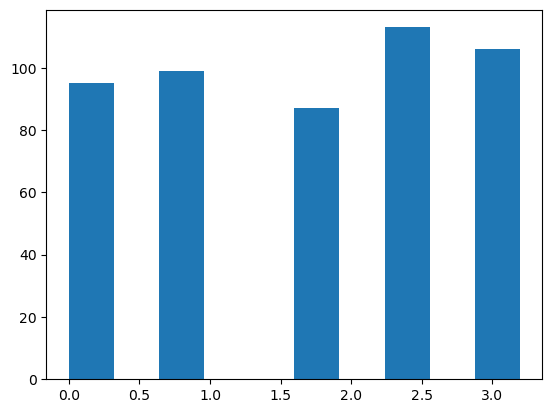

In [59]:
plt.hist(transformed)

In [60]:
x = transformed
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          2.187e+04
Date:                Fri, 03 Mar 2023   Prob (F-statistic):                        0.00
Time:                        08:49:45   Log-Likelihood:                         -368.58
No. Observations:                 500   AIC:                                      739.2
Df Residuals:                     499   BIC:                                      743.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6245      0.011    147.882      0.000       1.603       1.646
==============================================================================
Omnibus:                      121.702   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.262
Skew:                           0.609   Prob(JB):                     7.39e-12
Kurtosis:                       2.012   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
pred_val = model1.fittedvalues.copy()
true_val = ESI['satisfied'].values.copy()
residual = true_val - pred_val

In [62]:
pred_val = model1.fittedvalues.copy()
true_val = ESI['rating'].values.copy()
residual = true_val - pred_val

In [63]:
# Testing for Multicollinearity

In [64]:
ESI.corr()

Unnamed: 0       age  job_level    rating    onsite    awards  \
Unnamed: 0        1.000000  0.029372  -0.016834 -0.060811 -0.056124 -0.049831   
age               0.029372  1.000000  -0.057528 -0.096388 -0.054055 -0.019875   
job_level        -0.016834 -0.057528   1.000000  0.081829 -0.054843 -0.037793   
rating           -0.060811 -0.096388   0.081829  1.000000  0.009079  0.022983   
onsite           -0.056124 -0.054055  -0.054843  0.009079  1.000000  0.003722   
awards           -0.049831 -0.019875  -0.037793  0.022983  0.003722  1.000000   
certifications    0.027797  0.025335  -0.002632 -0.030503  0.043558 -0.030066   
salary           -0.022075 -0.048294   0.977539  0.081034 -0.057936 -0.032339   
satisfied        -0.036228  0.004490   0.010093  0.093024  0.027637  0.014763   

                certifications    salary  satisfied  
Unnamed: 0            0.027797 -0.022075  -0.036228  
age                   0.025335 -0.048294   0.004490  
job_level            -0.002632  0.977539   0.010093  
rating               -0.030503  0.081034   0.093024  
onsite                0.043558 -0.057936   0.027637  
awards               -0.030066 -0.032339   0.014763  
certifications        1.000000  0.004594  -0.011600  
salary                0.004594  1.000000   0.023168  
satisfied            -0.011600  0.023168   1.000000

<AxesSubplot:>

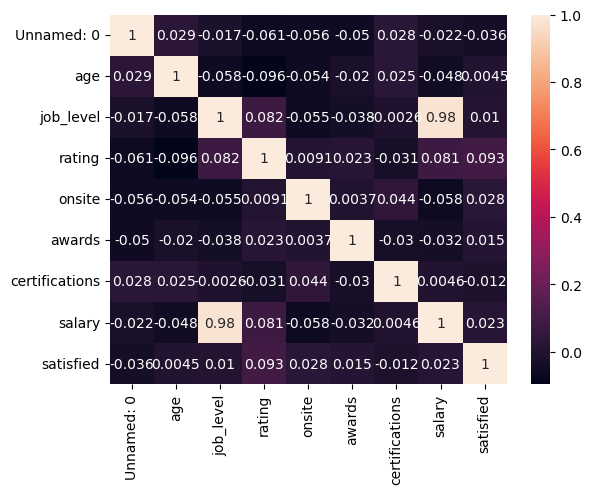

In [65]:
sns.heatmap(ESI.corr(), annot=True)

In [66]:
# Screening for Outliers

In [69]:
## I am not sure if this is right

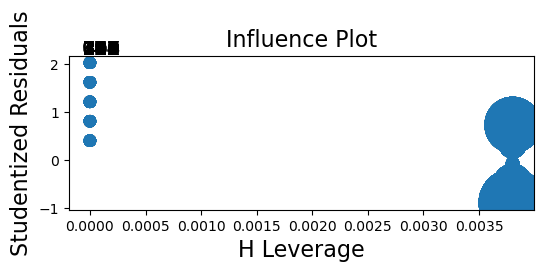

In [70]:
fig, ax = plt.subplots(figsize=(6,2))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [71]:
infl = model.get_influence()
print(infl.summary_frame())

     dfb_satisfied   cooks_d  standard_resid  hat_diag  dffits_internal  \
0        -0.030000  0.000901       -0.485961  0.003802        -0.030023   
1         0.000000  0.000000        2.024834  0.000000         0.000000   
2         0.000000  0.000000        0.404967  0.000000         0.000000   
3        -0.004951  0.000025       -0.080222  0.003802        -0.004956   
4        -0.055078  0.003035       -0.891700  0.003802        -0.055089   
..             ...       ...             ...       ...              ...   
495       0.045156  0.002041        0.731256  0.003802         0.045177   
496       0.000000  0.000000        1.619867  0.000000         0.000000   
497      -0.004951  0.000025       -0.080222  0.003802        -0.004956   
498       0.000000  0.000000        0.404967  0.000000         0.000000   
499       0.000000  0.000000        1.619867  0.000000         0.000000   

     student_resid    dffits  
0        -0.485589 -0.030000  
1         2.031165  0.000000  
2     

In [72]:
## Finding mean, median and mode

In [73]:
import statistics

In [85]:
ESIdata = ['rating']